<a href="https://colab.research.google.com/github/ElaanMoazen/ML---Movies-Sentiment-Analysis/blob/main/Elaan_Moazen_Assgnment3_elaan_mo_a_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text classification: Understanding the Customer's Feedback

---

Text classification is one of the important tasks of text mining

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1535125878/NLTK3_zwbdgg.png)

In this notebook, we will perform Sentiment Analysis on IMDB movies reviews. Sentiment Analysis is the art of extracting people's opinion from digital text. We will use a regression model from Scikit-Learn able to predict the sentiment given a movie review.

We will use [the IMDB movie review dataset](http://ai.stanford.edu/~amaas/data/sentiment/), which consists of 50,000 movies review (50% are positive, 50% are negative).

The libraries needed in this exercise are:
* [Numpy](http://www.numpy.org/) — a package for scientific computing.
* [Pandas](https://pandas.pydata.org/) — a library providing high-performance, easy-to-use data structures and data analysis tools for the Python
* [Matplotlib](https://matplotlib.org/) — a package for plotting & visualizations.
* [scikit-learn](http://scikit-learn.org/stable/index.html) — a tool for data mining and data analysis.
* [NLTK](http://www.nltk.org/) — a platform to work with natural language.

##Loading the data

### Importing the libraries and necessary dictionaries

In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from tensorflow import keras

# download Punkt Sentence Tokenizer
nltk.download('punkt')
# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading the dataset in our directory

In [ ]:
# download IMDB dataset
!wget "https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv" -O "movie_data.csv"

# list files in current directory
!ls -lah

--2024-05-08 08:06:33--  https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65862309 (63M) [text/plain]
Saving to: ‘movie_data.csv’

movie_data.csv      100%[===================>]  62.81M   202MB/s    in 0.3s    

2024-05-08 08:06:33 (202 MB/s) - ‘movie_data.csv’ saved [65862309/65862309]

total 63M
drwxr-xr-x 1 root root 4.0K May  8 08:05 .
drwxr-xr-x 1 root root 4.0K May  8 08:01 ..
drwxr-xr-x 4 root root 4.0K May  6 13:19 .config
-rw-r--r-- 1 root root  63M May  8 08:06 movie_data.csv
drwxr-xr-x 1 root root 4.0K May  6 13:19 sample_data


###Reading the dataset file and getting info on it
**Question 1:** Use pandas to read the csv file and display the first 5 rows

In [ ]:
# path to IMDB dataseet
file_path = "movie_data.csv"

# read file (dataset) into our program using pandas
df = pd.read_csv(file_path)

# display first 5 rows
# df.head it print print first 5 row by defult.
#if you want to print first 10 row for example --> df.head(10)
print(df.head())

                                              review  sentiment
0  I went and saw this movie last night after bei...          1
1  Actor turned director Bill Paxton follows up h...          1
2  As a recreational golfer with some knowledge o...          1
3  I saw this film in a sneak preview, and it is ...          1
4  Bill Paxton has taken the true story of the 19...          1


Getting info on our dataset

In [ ]:
# I change data.info to --> df = pd.read_csv(file_path)
#beacuse data path is saved in ( df = data frame  ) virable
# this method "info()" print No.( entries, datatype , ColumnName ) information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


A balanced dataset in sentiment analysis is a dataset which holds an equal amount of positive sentiment data and negative sentiment data, meaning 50% of the data is positive and 50% is negative

**Question 2:** Check if dataset is balanced (number of positive sentiment = number of negative sentiment) by plotting the different classes

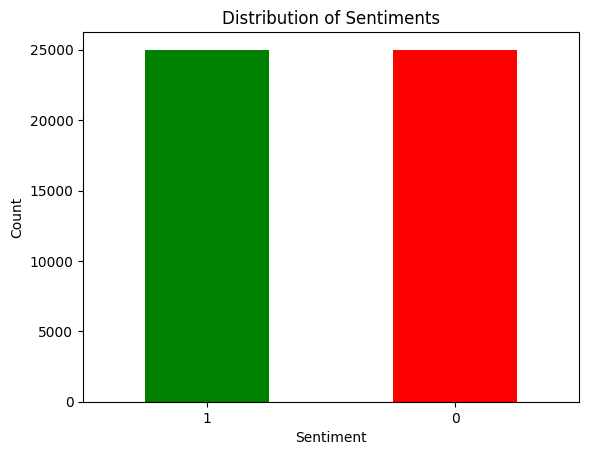

In [ ]:
# Count the number of positive and negative sentiment samples
# the coulment name "sentiment" count it
sentiment_counts = df['sentiment'].value_counts()

# Plot the distribution of classes
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Sentiments')
# Sentiment is include ( + or - )
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# EXTRA - code to check if the data balanced or not?
# Check if dataset is balanced
if sentiment_counts.get('positive', 0) == sentiment_counts.get('negative', 0):
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")

The dataset is balanced.


## Text cleaning

In [ ]:
# change it from (data.) to --> (df.)
print(df.review[10])

I loved this movie from beginning to end.I am a musician and i let drugs get in the way of my some of the things i used to love(skateboarding,drawing) but my friends were always there for me.Music was like my rehab,life support,and my drug.It changed my life.I can totally relate to this movie and i wish there was more i could say.This movie left me speechless to be honest.I just saw it on the Ifc channel.I usually hate having satellite but this was a perk of having satellite.The ifc channel shows some really great movies and without it I never would have found this movie.Im not a big fan of the international films because i find that a lot of the don't do a very good job on translating lines.I mean the obvious language barrier leaves you to just believe thats what they are saying but its not that big of a deal i guess.I almost never got to see this AMAZING movie.Good thing i stayed up for it instead of going to bed..well earlier than usual.lol.I hope you all enjoy the hell of this movi

**Question 3:** Let's define a function that would clean each movie review (sentence)

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

english_stopwords = stopwords.words('english')
stemmer = PorterStemmer()

# define cleaning function
def clean_review(text):
   # Convert text to lowercase
    text = text.lower()
    # Remove special characters and numbers, keep only letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in english_stopwords]
    # Stemming
    words = [stemmer.stem(word) for word in words]
    # Join the words back into a string
    cleaned_text = ' '.join(words)

    # Change it from (text) to (cleaned_text)
    return cleaned_text

**Question 4 :** Try it out on an instance of the dataset then on the entire dataset.

In [ ]:
#This code will clean a single instance of the dataset first
# Try it out on an instance [5] from the dataset

sample_review = df['review'][5]  # 'review' is the column containing movie reviews
# (clean_review) is the name of cleaning function from Q3
cleaned_sample_review = clean_review(sample_review)
print("Original Review:")
print(sample_review)
print("\nCleaned Review:")
print(cleaned_sample_review)


Original Review:
I saw this film on September 1st, 2005 in Indianapolis. I am one of the judges for the Heartland Film Festival that screens films for their Truly Moving Picture Award. A Truly Moving Picture "...explores the human journey by artistically expressing hope and respect for the positive values of life." Heartland gave that award to this film.<br /><br />This is a story of golf in the early part of the 20th century. At that time, it was the game of upper class and rich "gentlemen", and working people could only participate by being caddies at country clubs. With this backdrop, this based-on-a-true-story unfolds with a young, working class boy who takes on the golf establishment and the greatest golfer in the world, Harry Vardon.<br /><br />And the story is inspirational. Against all odds, Francis Ouimet (played by Shia LaBeouf of "Holes") gets to compete against the greatest golfers of the U.S. and Great Britain at the 1913 U.S. Open. Francis is ill-prepared, and has a child

And now clean the entire dataset reviews

In [ ]:
# apply to all dataset
#storing the cleaned reviews in a NEW column called 'clean_review'
df['cleaned_review'] = df['review'].apply(clean_review)
# print First 10 row
df.head(10)


,review,sentiment,cleaned_review,clean_review
0,I went and saw this movie last night after bei...,1,went saw movi last night coax friend mine ill ...,went saw movi last night coax friend mine ill ...
1,Actor turned director Bill Paxton follows up h...,1,actor turn director bill paxton follow promis ...,actor turn director bill paxton follow promis ...
2,As a recreational golfer with some knowledge o...,1,recreat golfer knowledg sport histori pleas di...,recreat golfer knowledg sport histori pleas di...
3,"I saw this film in a sneak preview, and it is ...",1,saw film sneak preview delight cinematographi ...,saw film sneak preview delight cinematographi ...
4,Bill Paxton has taken the true story of the 19...,1,bill paxton taken true stori us golf open made...,bill paxton taken true stori us golf open made...
5,"I saw this film on September 1st, 2005 in Indi...",1,saw film septemb st indianapoli one judg heart...,saw film septemb st indianapoli one judg heart...
6,"Maybe I'm reading into this too much, but I wo...",1,mayb im read much wonder much hand hongsheng d...,mayb im read much wonder much hand hongsheng d...
7,I felt this film did have many good qualities....,1,felt film mani good qualiti cinematographi cer...,felt film mani good qualiti cinematographi cer...
8,This movie is amazing because the fact that th...,1,movi amaz fact real peopl portray real life ex...,movi amaz fact real peopl portray real life ex...
9,"""Quitting"" may be as much about exiting a pre-...",1,quit may much exit preordain ident drug withdr...,quit may much exit preordain ident drug withdr...


## Split dataset for training and testing
We will split our data into two subsets: a 50% subset will be used for training the model for prediction and the remaining 50% will be used for evaluating or testing its performance. The random state ensures reproducibility of the results.

**Question 5:** Split your data to get x_train, x_test, y_train and y_test.

In [ ]:
from sklearn.model_selection import train_test_split

X = df['cleaned_review']  # Features
y = df['sentiment']  # Target

# Split data into 50% training & 50% test
# Use a random state of 42 for example to ensure having the same split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


## Feature extraction with Bag of Words


**Question 6:**  In this section, apply the Bag of Words method to learn the vocabulary of your text and with it transform your training input data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# define a CountVectorizer (with binary=True and max_features=10000)
vectorizer = CountVectorizer(binary=True, max_features=10000)

# learn the vocabulary of all tokens in our training dataset
vectorizer.fit(x_train)

# transform x_train to bag of words
x_train_bow = vectorizer.transform(x_train)
x_test_bow = vectorizer.transform(x_test)

print(x_train_bow.shape, y_train.shape)
print(x_test_bow.shape, y_test.shape)

(25000, 10000) (25000,)
(25000, 10000) (25000,)


## Classification

**Question 7:** Your data is ready for classification. For this task use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.linear_model import LogisticRegression
# if we increase the ( max_features=10000 ) the accurcy will increase
# define the LogisticRegression classifier
classifire = LogisticRegression()

# train the classifier on the training data
classifire.fit(x_train_bow, y_train)

# get the mean accuracy on the training data
acc_train = classifire.score(x_train_bow, y_train)

print('Training Accuracy:', acc_train)

Training Accuracy: 0.98244


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Question 8:**  Evaluating the performance of your model through its accuracy score

In [ ]:
# Evaluate model with test data
acc_test = classifire.score(x_test_bow, y_test)

print('Test Accuracy:', acc_test)

Test Accuracy: 0.86336


## Bonus: Let's use the model to predict!
To do so, let's create a predict function which takes as argument your model and the bag of words vectorizer together with a review on which it would predict the sentiment. This review should be cleaned with the `clean_review` function we built, transformed by bag of words and then used for prediction with `model.predict()`.

In [ ]:
# define predict function

def predict_sentiment(classifire, vectorizer, review):
    # Clean the review using the clean_review function
    cleaned_review = clean_review(review)
    # Transform the cleaned review into bag of words representation
    bow_review = vectorizer.transform([cleaned_review])
    # Predict the sentiment using the trained model
    prediction = classifire.predict(bow_review)
    # Return the predicted sentiment
    return prediction[0]





And let's try it out on an example

In [ ]:
# Example review
review = 'The movie was wonderful!'

# Predict sentiment
predict = predict_sentiment(classifire, vectorizer, review)

if predict == 1 :
  print ("POSITIVE REVIEW 😀🌟")
else :
  print ("NEGITIVE REVIEW 😠")

#print("Predicted Sentiment:" , predict)

POSITIVE REVIEW 😀🌟
